In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.rename(columns={'Genre':'Gender'})

In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### ExploratoryDataAnalysis(EDA)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
feature = df.drop(columns='CustomerID')

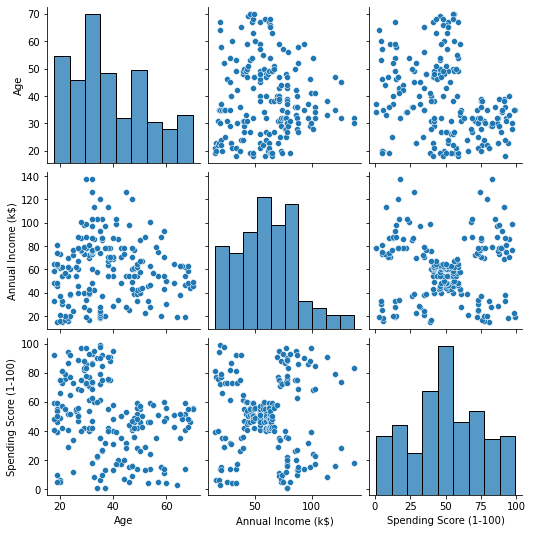

In [9]:
sns.pairplot(feature,kind='scatter')
plt.show()

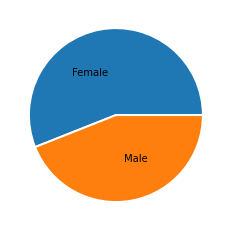

In [10]:
gender_count = df['Gender'].value_counts()
plt.pie(gender_count.values,labels=gender_count.index,labeldistance=0.5,wedgeprops={'linewidth':2,'edgecolor':'white'})
plt.show()

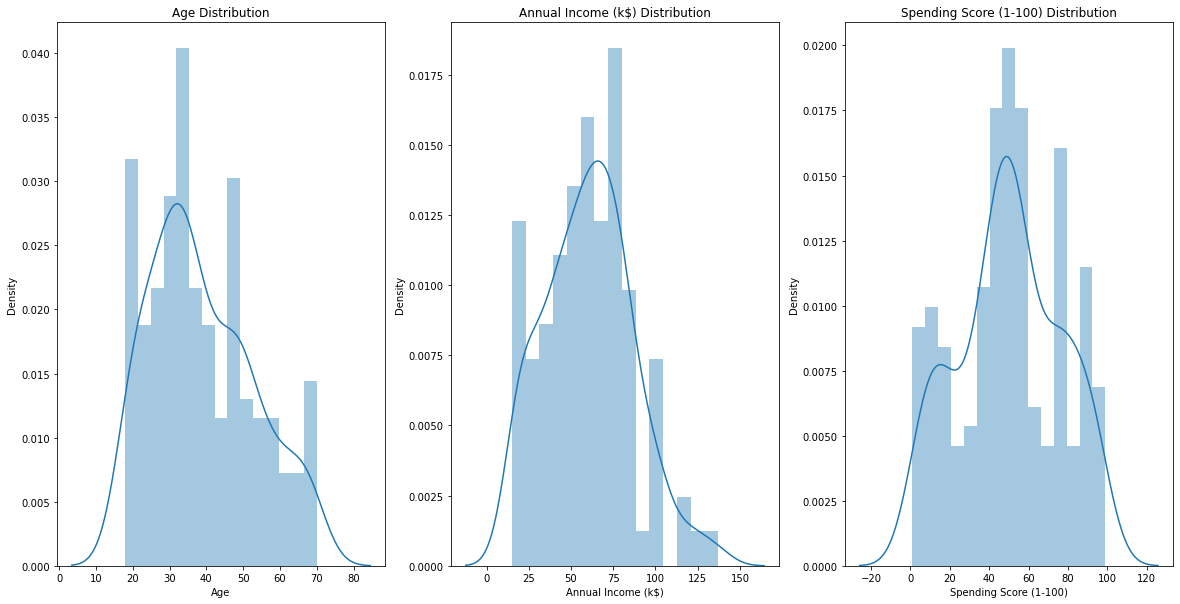

In [11]:
plt.figure(figsize=(20,10))
n=1
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.2)
    sns.distplot(df[i], bins=15)
    plt.title('{} Distribution'.format(i))
    n += 1

## Clustering by KMeans

In [12]:
from sklearn.cluster import KMeans

In [13]:
# Turn non-numeric feature into number
# Male=0, Female=1
# feature.loc[feature['Gender']=='Male','Gender']=0
# feature.loc[feature['Gender']=='Female','Gender']=1

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feature['Gender'] = le.fit_transform(feature['Gender'])

### Elbow Method

In [15]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(feature)
    km.fit(feature)
    wcss.append(km.inertia_)

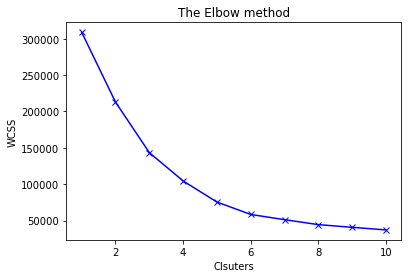

In [16]:
plt.plot(range(1,11),wcss,'bx-')
plt.xlabel('Clsuters')
plt.ylabel('WCSS')
plt.title('The Elbow method')
plt.show()

In [17]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75412.59682443162,
 58348.64136331505,
 51147.01731797612,
 44355.31351771352,
 40639.66039466073,
 37084.67559302713]

### Modelling

##### 3 Clusterings

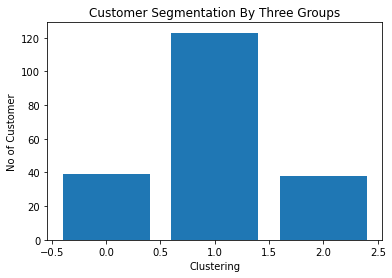

In [18]:
km = KMeans(n_clusters=3).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count =np.unique(y_km, return_counts=True)
plt.bar(n_cluster,km_count)
plt.ylabel('No of Customer')
plt.xlabel('Clustering')
plt.title('Customer Segmentation By Three Groups')
plt.show()

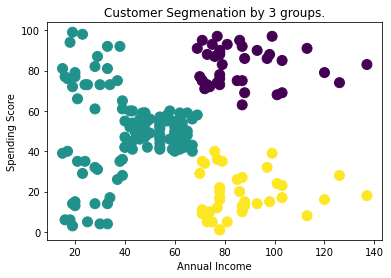

In [19]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=y_km,s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmenation by 3 groups.')
plt.show()

##### 4 Clustering

Text(0.5, 1.0, 'Customer segmentation by 4 groups')

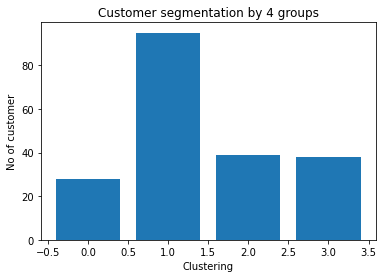

In [20]:
km = KMeans(n_clusters=4).fit(feature)
y_km = km.fit_predict(feature)
n_cluster,km_count = np.unique(y_km,return_counts=True)
plt.bar(n_cluster,km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 4 groups')

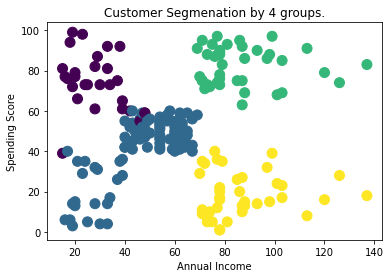

In [22]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=y_km,s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmenation by 4 groups.')
plt.show()            

##### 5 Clustering

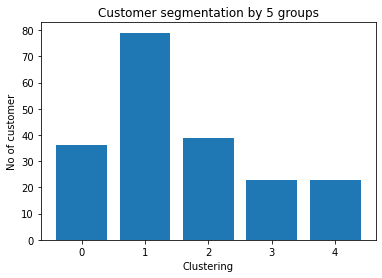

In [24]:
km = KMeans(n_clusters=5).fit(feature)
y_km = km.fit_predict(feature)
n_cluster,km_count = np.unique(y_km,return_counts=True)
plt.bar(n_cluster,km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 5 groups')
plt.show()

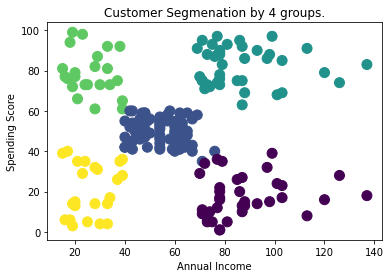

In [27]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=y_km,s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmenation by 4 groups.')
plt.show() 
